In [ ]:
# Install Category Encoders
! pip install category_encoders

In [ ]:
!pip install kneed 
from kneed import DataGenerator, KneeLocator 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import matplotlib.cm as cm
from scipy import stats

import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import Dataset
from google.colab import files
uploaded = files.upload()


Saving dataset_tugas.csv to dataset_tugas (1).csv


In [ ]:
#import data to Google Colab 
import pandas as pd 
df_customer = pd.read_csv('dataset_tugas.csv', sep=';')

In [ ]:
#Check our dataset 
df_customer 

,customer,gender,age,ann_income_kUSD,spending_score
0,1,female,49,42,52
1,2,male,33,42,60
2,3,female,31,43,54
3,4,male,59,43,60
4,5,female,50,43,45
...,...,...,...,...,...
166,167,female,44,73,7
167,168,male,32,73,73
168,169,male,19,74,10
169,170,female,35,74,72


Dari hasil diatas, terdapat 171 data yang mulainya dari 0

In [ ]:
# Prints the Dataset Information
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer         171 non-null    int64 
 1   gender           171 non-null    object
 2   age              171 non-null    int64 
 3   ann_income_kUSD  171 non-null    int64 
 4   spending_score   171 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.8+ KB


In [ ]:
#rename head of Dataset 
df_customer.rename(index=str, columns={'ann_income_kUSD': 'income',
                              'spending_score': 'score'}, inplace=True)
df_customer.head()

,customer,gender,age,income,score
0,1,female,49,42,52
1,2,male,33,42,60
2,3,female,31,43,54
3,4,male,59,43,60
4,5,female,50,43,45


In [ ]:
# Prints Descriptive Statistics
df_customer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer,171.0,86.000000,49.507575,1.0,43.5,86.0,128.5,171.0
age,171.0,39.385965,13.523950,18.0,30.0,38.0,48.0,70.0
income,171.0,71.935673,19.535833,42.0,60.0,71.0,78.0,137.0
score,171.0,50.643275,25.129692,1.0,35.5,50.0,71.5,97.0


### Clusterring

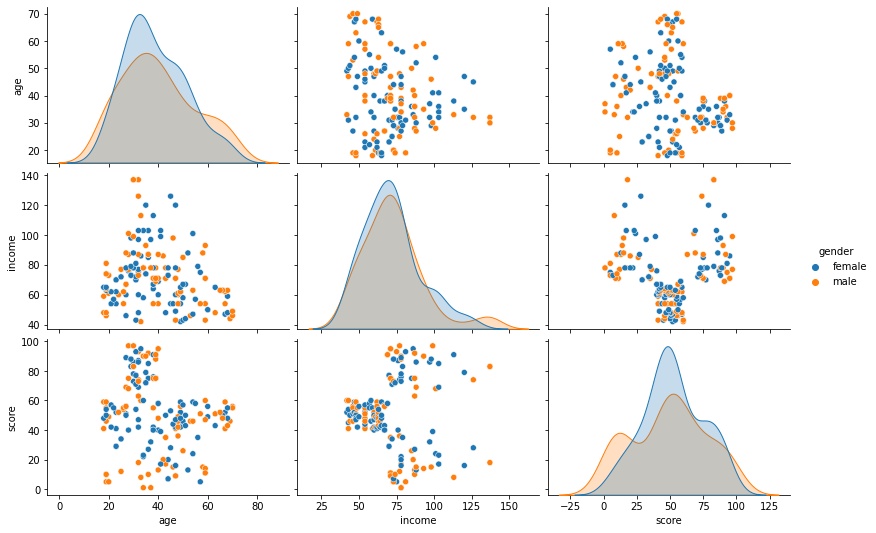

In [ ]:
# Let's see our data in a detailed way with pairplot
X = df_customer.drop(['customer', 'gender'], axis=1)
sns.pairplot(df_customer.drop('customer', axis=1), hue='gender', aspect=1.5)
plt.show()

Text(420.98981770833336, 0.5, 'Spending Score')

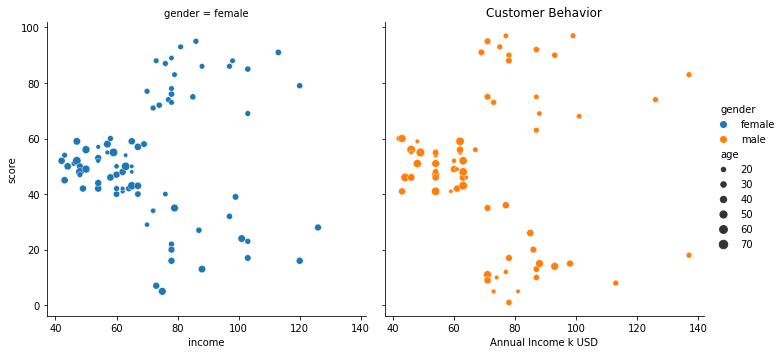

In [ ]:
# Scatter Plot
sns.relplot(x='income', y='score', hue='gender', size='age', kind='scatter', col='gender', data=df_customer)
plt.title('Customer Behavior')
plt.xlabel('Annual Income k USD')
plt.ylabel('Spending Score')

**Visualisasi korelasi antara fitur**

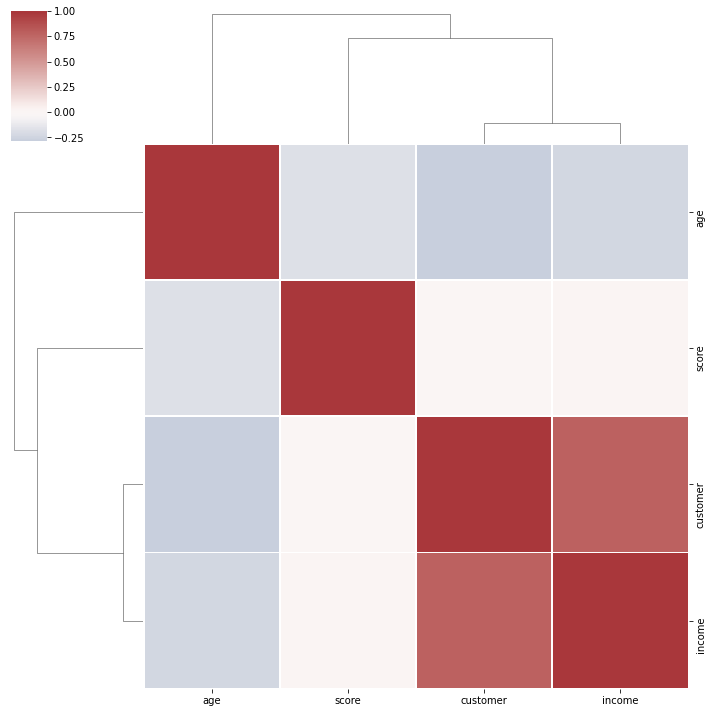

In [ ]:
# Correlation to see hierarchically clustered heatmap
sns.clustermap(df_customer.corr(), center=0, cmap='vlag', linewidths=.75)

### Data Preprocessing

In [ ]:
# Check for Missing Values
df_customer.isnull().sum()

customer    0
gender      0
age         0
income      0
score       0
dtype: int64

In [ ]:
#datashape ( we have 171 list of data with 5 data head)
df_customer.shape


(171, 5)

In [ ]:
#selecting feature
X_numerics = df_customer.iloc[:,[3,4]].values 

In [ ]:
Z_numerics = df_customer[['income', 'score']]

In [ ]:
Z_numerics

,income,score
0,42,52
1,42,60
2,43,54
3,43,60
4,43,45
...,...,...
166,73,7
167,73,73
168,74,10
169,74,72


### K-Means

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(Z_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(Z_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [ ]:
#Determine the optimal number of cluster 
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Z_numerics)
    wcss.append(kmeans.inertia_)
kl = KneeLocator(
    range(1,11), wcss, curve="convex", direction= "decreasing")
kl.elbow 
    

3

Dari data diatas, ditunjukan bahwa ada 3 cluster yang optimal untuk digunakan

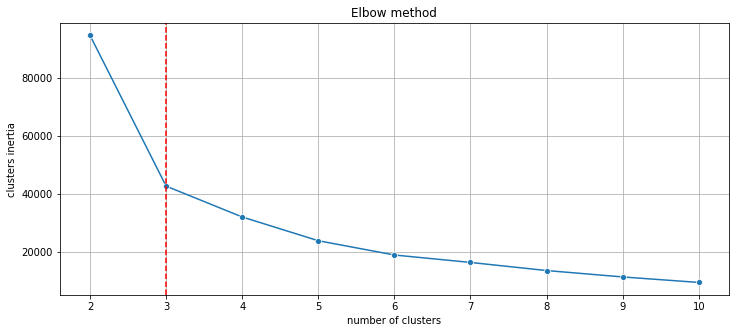

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

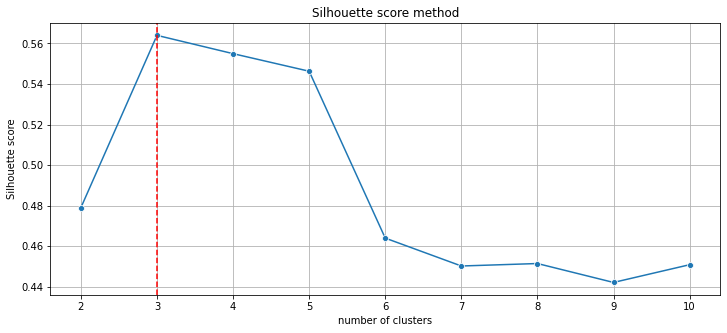

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Berdasarkan data diatas, titik 5 memiliki silhouette soce yang paling tinggi. Berarti terdapat 5 cluster yang paling baik digunakan

In [ ]:
x = df_customer.iloc[:,[3,4]].values

For n_clusters = 2 The average silhouette_score is : 0.4790347907214159
For n_clusters = 3 The average silhouette_score is : 0.5640084440629347
For n_clusters = 4 The average silhouette_score is : 0.5549842276066493
For n_clusters = 5 The average silhouette_score is : 0.5463188736508654
For n_clusters = 6 The average silhouette_score is : 0.4600469662552408
For n_clusters = 7 The average silhouette_score is : 0.4531388258621489
For n_clusters = 8 The average silhouette_score is : 0.4438899798598866
For n_clusters = 9 The average silhouette_score is : 0.45143830324774553
For n_clusters = 10 The average silhouette_score is : 0.4576067309033354


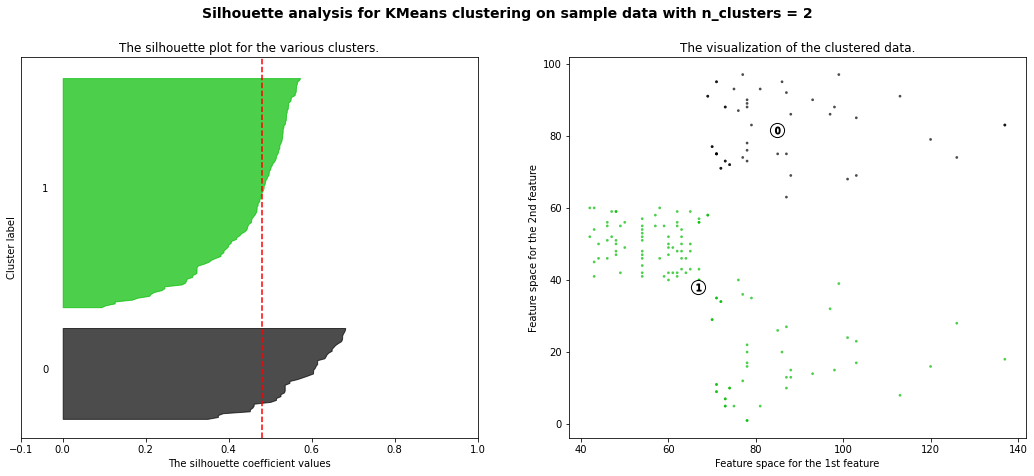

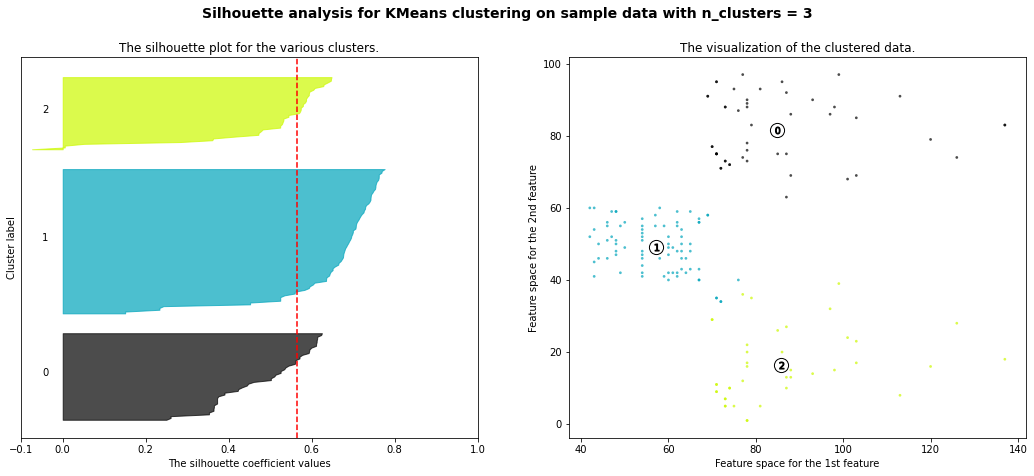

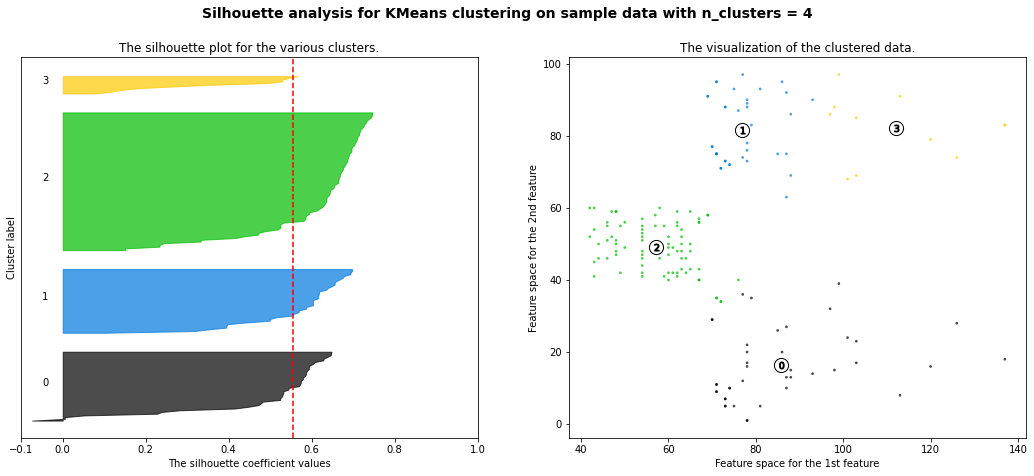

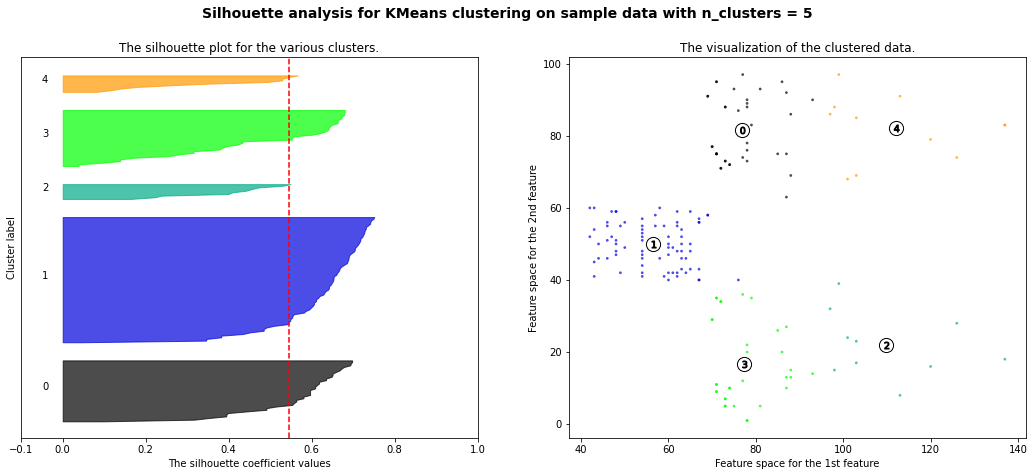

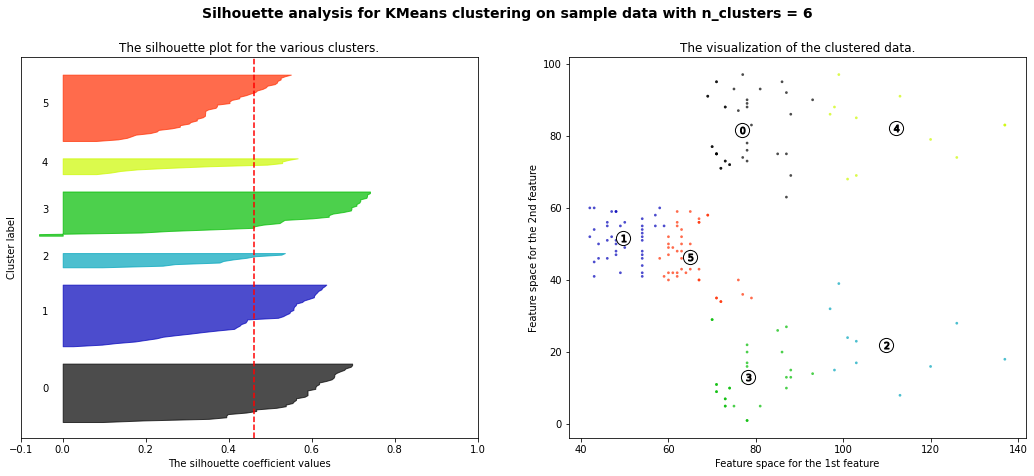

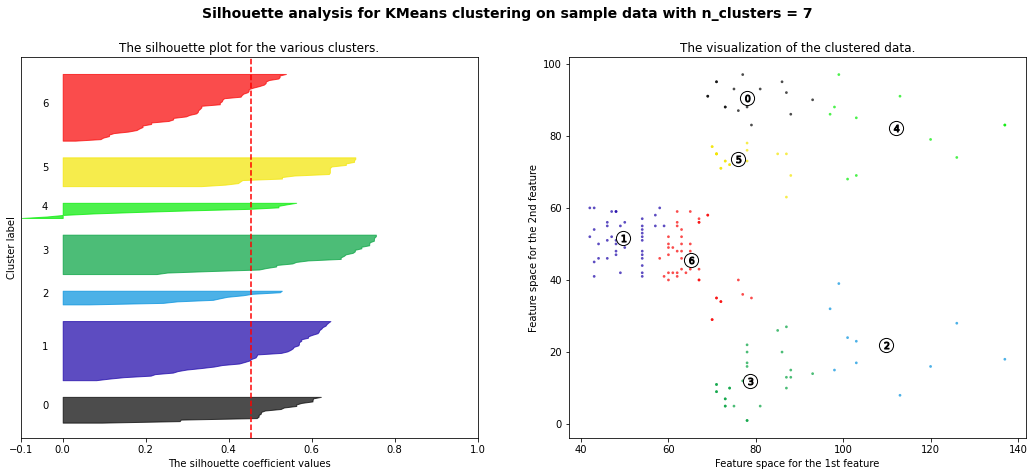

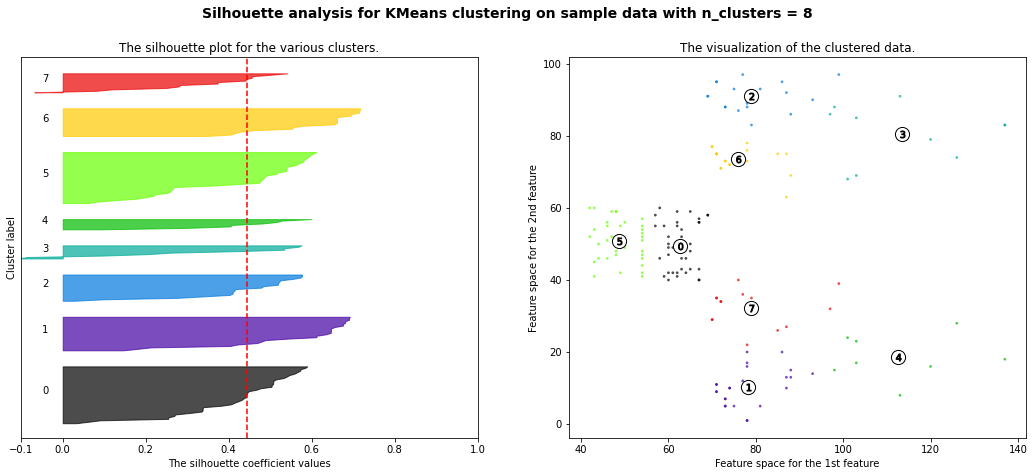

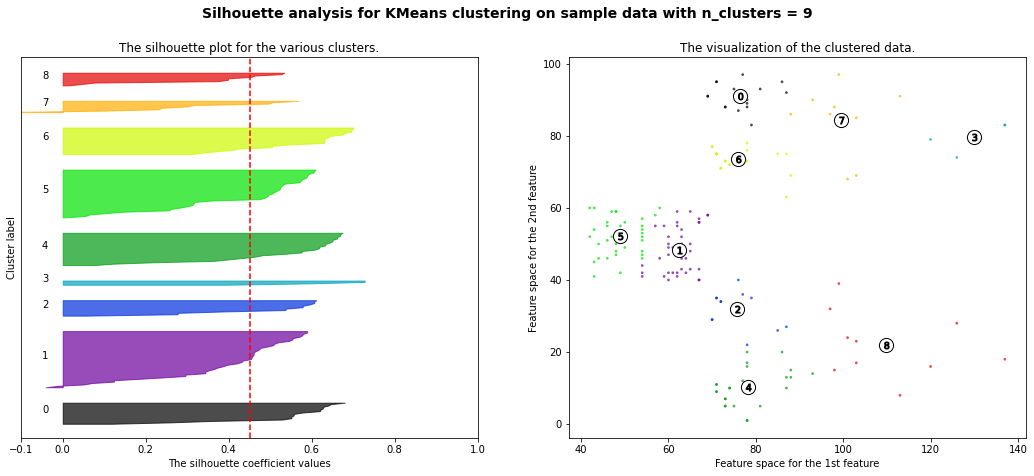

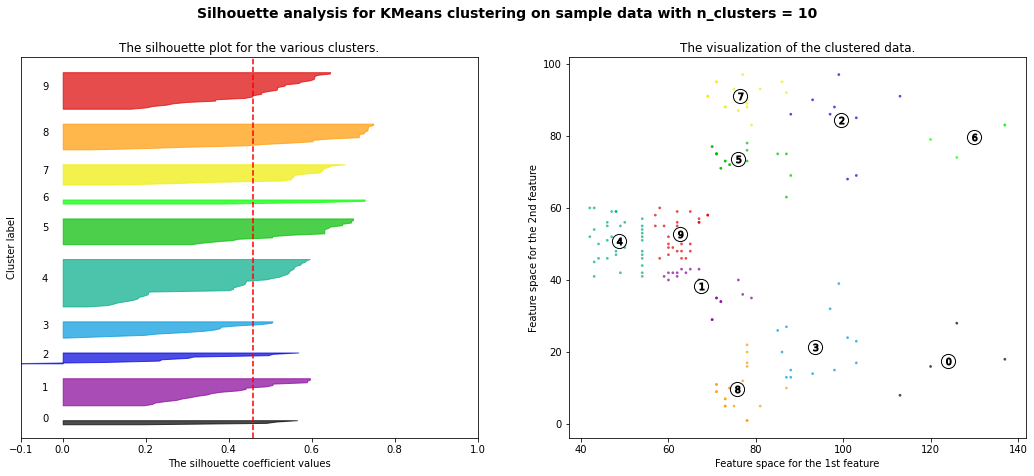

In [ ]:
# Silhouette score (study the separation distance between the resulting clusters) 
# how close each point in one cluster is to points in the neighboring clusters 
# thus provides a way to assess parameters like number of clusters visually
import numpy as np

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Menambah variabel lain

In [ ]:
#selecting feature coba dengan tambah variabel lain
Z_numerics = df_customer.iloc[:,[2,3,4]].values 

In [ ]:
Z_numerics = df_customer[['age','income', 'score']] # subset with numerical only

In [ ]:
KM_clusters = KMeans(n_clusters=3, init='k-means++').fit(Z_numerics) # initialise and fit K-Means model

KM_clustered = Z_numerics.copy()
KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_ # append labels to points

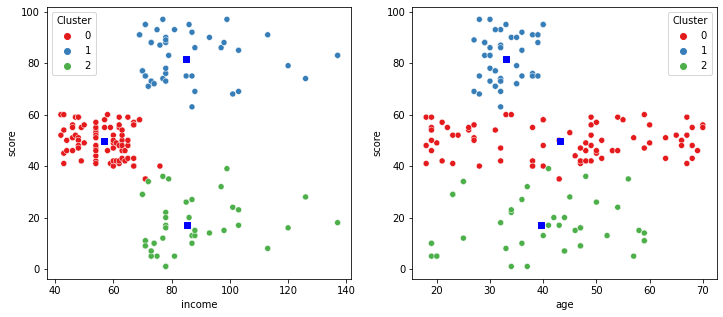

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('income', 'score', data=KM_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('age', 'score', data=KM_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_clusters.cluster_centers_[:,1],KM_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_clusters.cluster_centers_[:,0],KM_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

Dalam hasil K-Means Scatterplot diatas, cluster 0 memiliki income yang sedang dan pengeluaran yang sedang. Cluster 1 memiliki income yang tinggi dan pengeluaran yang tinggi. Dan Cluster 2 memiliki income yang rendah dan pengeluaran yang rendah.

In [ ]:
#Sizes of the clusters:
KM_clust_sizes = KM_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,79
1,49
2,43


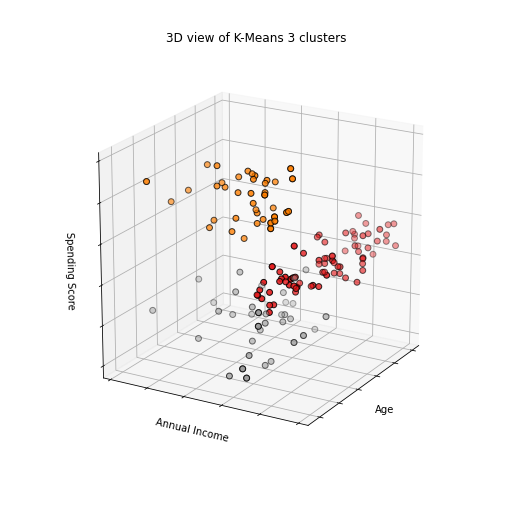

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM_clustered['age'],
           KM_clustered['income'],
           KM_clustered['score'],
           c=KM_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D view of K-Means 3 clusters')
ax.dist = 12

plt.show()

In [ ]:
# Below a Plotly version:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['age'],
        y = db[db['Cluster']==n]['score'],
        z = db[db['Cluster']==n]['income'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 3
        )
     )

trace0 = tracer(KM_clustered, 0, 'Cluster 0')
trace1 = tracer(KM_clustered, 1, 'Cluster 1')
trace2 = tracer(KM_clustered, 2, 'Cluster 2')

data = [trace0, trace1, trace2]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#first create a matrix of investigated combinations.
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
#Colecting number of generated clusters.
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(Z_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(Z_numerics, DBS_clustering.labels_))

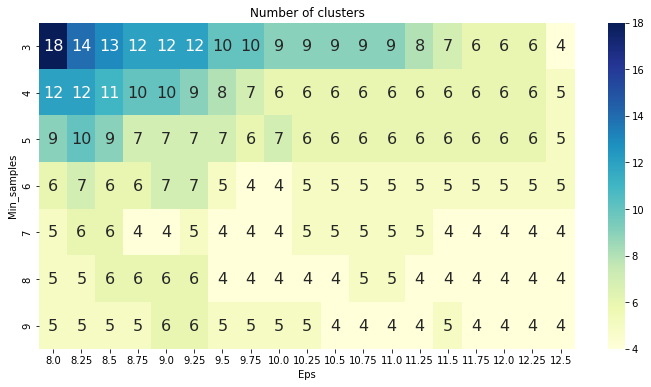

In [ ]:
#A heatplot to shows how many clusters were genreated by the algorithm for the respective parameters combinations.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

Dalam Matrix, terlihat beberapa warna yang pekat yang dimana semakin pekat warna, semakin tinggi korelasi yang didapat

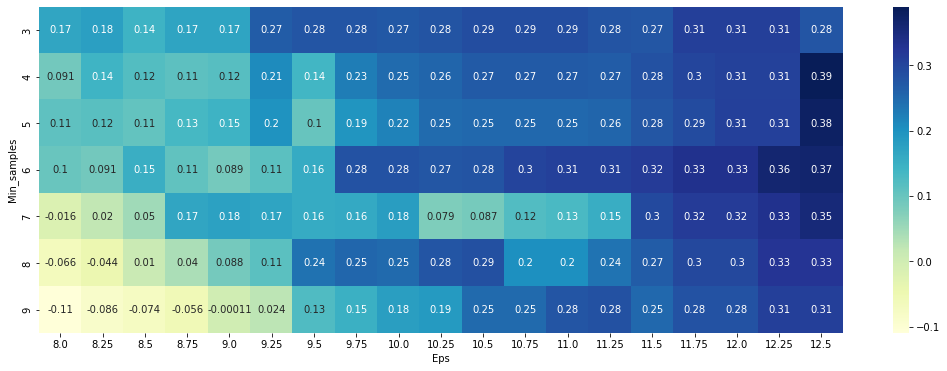

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Dari data diatas, Terdapat Global maximum sebesasr 0.39, eps 12.5, dan min_samples adalah 4

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(Z_numerics)

DBSCAN_clustered = Z_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,10
0,85
1,43
2,27
3,6


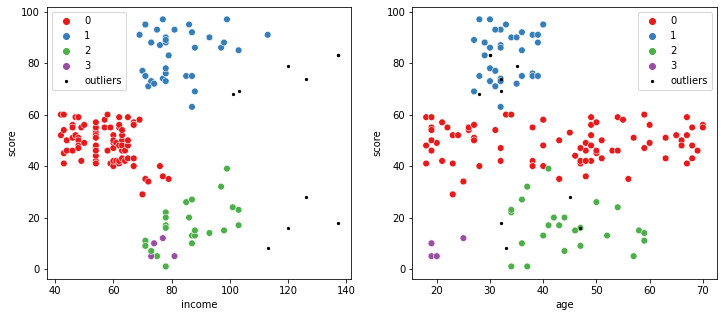

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('income', 'score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('age', 'score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['income'], outliers['score'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['age'], outliers['score'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

### Comparison

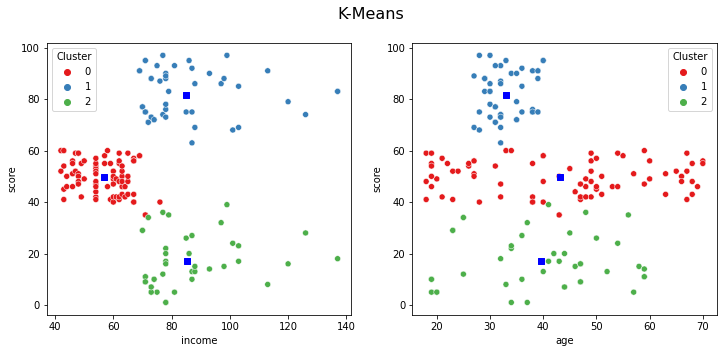

In [ ]:
fig1.suptitle('K-Means', fontsize=16)
fig1

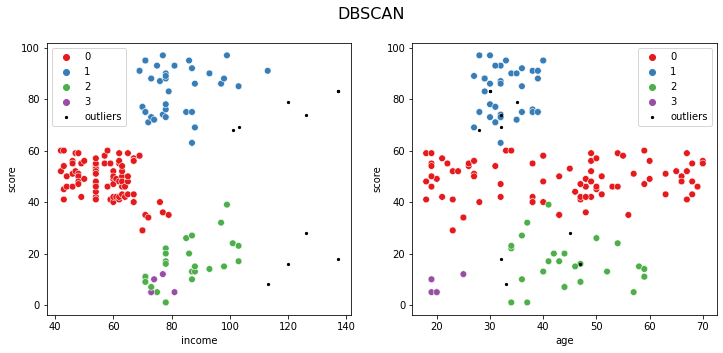

In [ ]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

In [ ]:
clusters = pd.concat([KM_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size
Cluster,,
-1,NaN,10
0,79.0,85
1,49.0,43
2,43.0,27
3,NaN,6


Dari perbandingan data diatas, lebih baik di bagian K-Means karena persebaran data yang lebih rata sehingga lebih mudah diukur

**Data Standardization**

In [ ]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Select Data
df_standardized = df_customer[['age',	'income',	'score']]

# Fit Standardization
column_names = df_standardized.columns.tolist()
df_standardized[column_names] = scaler.fit_transform(df_standardized[column_names])
df_standardized.sort_index(inplace=True)
df_standardized

,age,income,score
0,0.712977,-1.536847,0.054147
1,-0.473584,-1.536847,0.373431
10,2.270339,-1.331494,0.213789
100,0.268017,0.311332,-1.342718
101,-0.028623,0.311332,1.490923
...,...,...,...
95,-0.844384,0.259994,1.850117
96,0.638817,0.259994,-0.584419
97,-0.547744,0.259994,0.932177
98,-0.399423,0.311332,-1.143165


### Hierarchical Clustering (visualization)

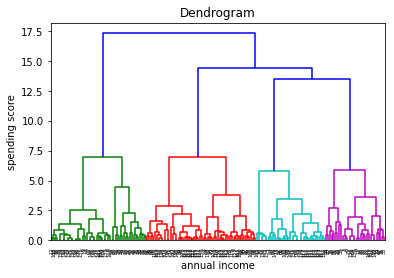

In [ ]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(df_standardized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.rcParams["figure.figsize"] = [8,4]
plt.show()

Dari Data Hierircal diatas, Warna merah dan hijau memiliki spending score sebanyak 7.5 atau termasuk sedang dan annual income yang rendah. warna biru mudah dan ungu memiliki spending score sebesar 5 yang berarti sedang dan memiliki annual income yang rendah. Sedangkan warna Biru biasa itu memiliki spending score 17.5 yang berarti tinggi dan juga annual income yang tinggi